In [29]:
import pandas as pd 

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.10.29/data_sum.xlsx")

data

,FORCE_C(Left),X COORDINATE_C(Left),Y COORDINATE_C(Left),FSR DATA_C(Left),FORCE_B(Right),FSR DATA_B(Right)
0,1.245014,1.529382,-0.886157,1.361804,2.277552,1.757358
1,1.274000,1.749337,-1.368345,1.264316,2.319914,1.524890
2,1.389941,1.748738,-1.086286,1.166829,2.447001,1.524890
3,1.254676,1.777098,-1.389048,0.874366,2.531726,1.292421
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
608,2.037281,0.870283,0.317515,1.069341,1.472665,-0.334861
609,1.969648,0.872209,0.349021,1.166829,0.413604,-0.102392
610,1.998633,1.085799,0.020937,1.069341,1.345578,0.362545
611,1.902016,0.930805,0.082657,0.776878,1.049041,1.059952


In [30]:
data.isnull().sum()

FORCE_C(Left)           265
X COORDINATE_C(Left)    265
Y COORDINATE_C(Left)    265
FSR DATA_C(Left)        265
FORCE_B(Right)          265
FSR DATA_B(Right)       265
dtype: int64

In [31]:
print(265/613)

0.43230016313213704


FORCE_C(Left)


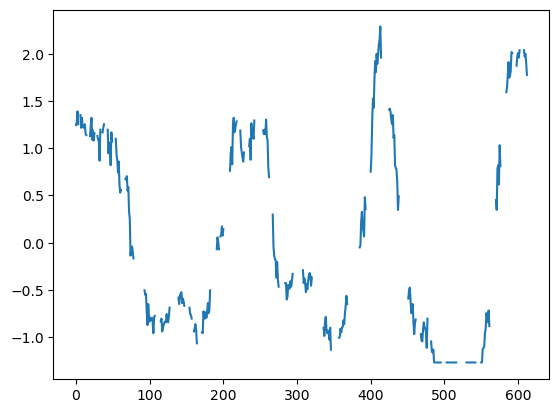

X COORDINATE_C(Left)


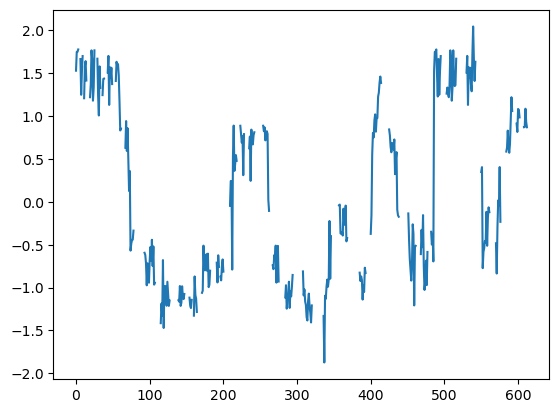

Y COORDINATE_C(Left)


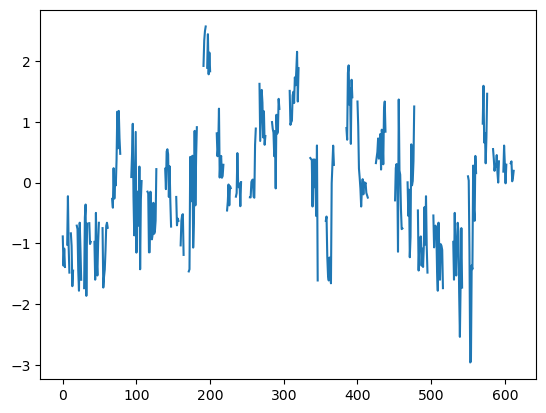

FSR DATA_C(Left)


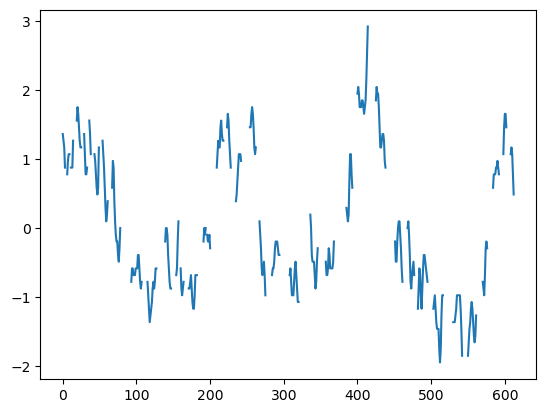

FORCE_B(Right)


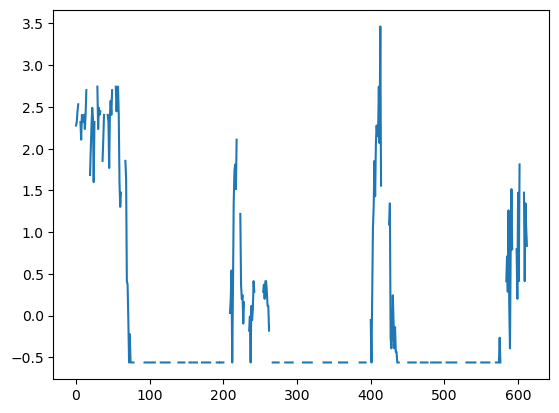

FSR DATA_B(Right)


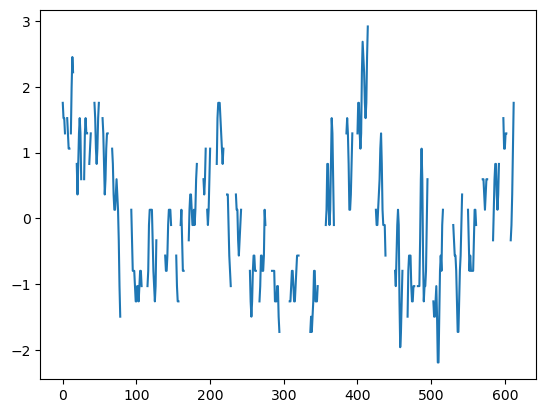

In [32]:

import matplotlib.pyplot as plt

columns=data.columns
count=0
for i in columns:
    print(columns[count])
    count=count+1
    plt.plot(data[i])
    plt.show()
    
    
    

In [33]:
data2=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.10.29/squart.xlsx")

R2=data2.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
R_scaled=scaler.fit_transform(R2)

R3=pd.DataFrame(data=R_scaled)

R_new=R3.set_axis(["FORCE_B(Right)","FSR DATA_B(Right)"],axis="columns")

In [34]:
R=data.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]
L=data.loc[:,['FORCE_C(Left)','FSR DATA_C(Left)']]

<Axes: >

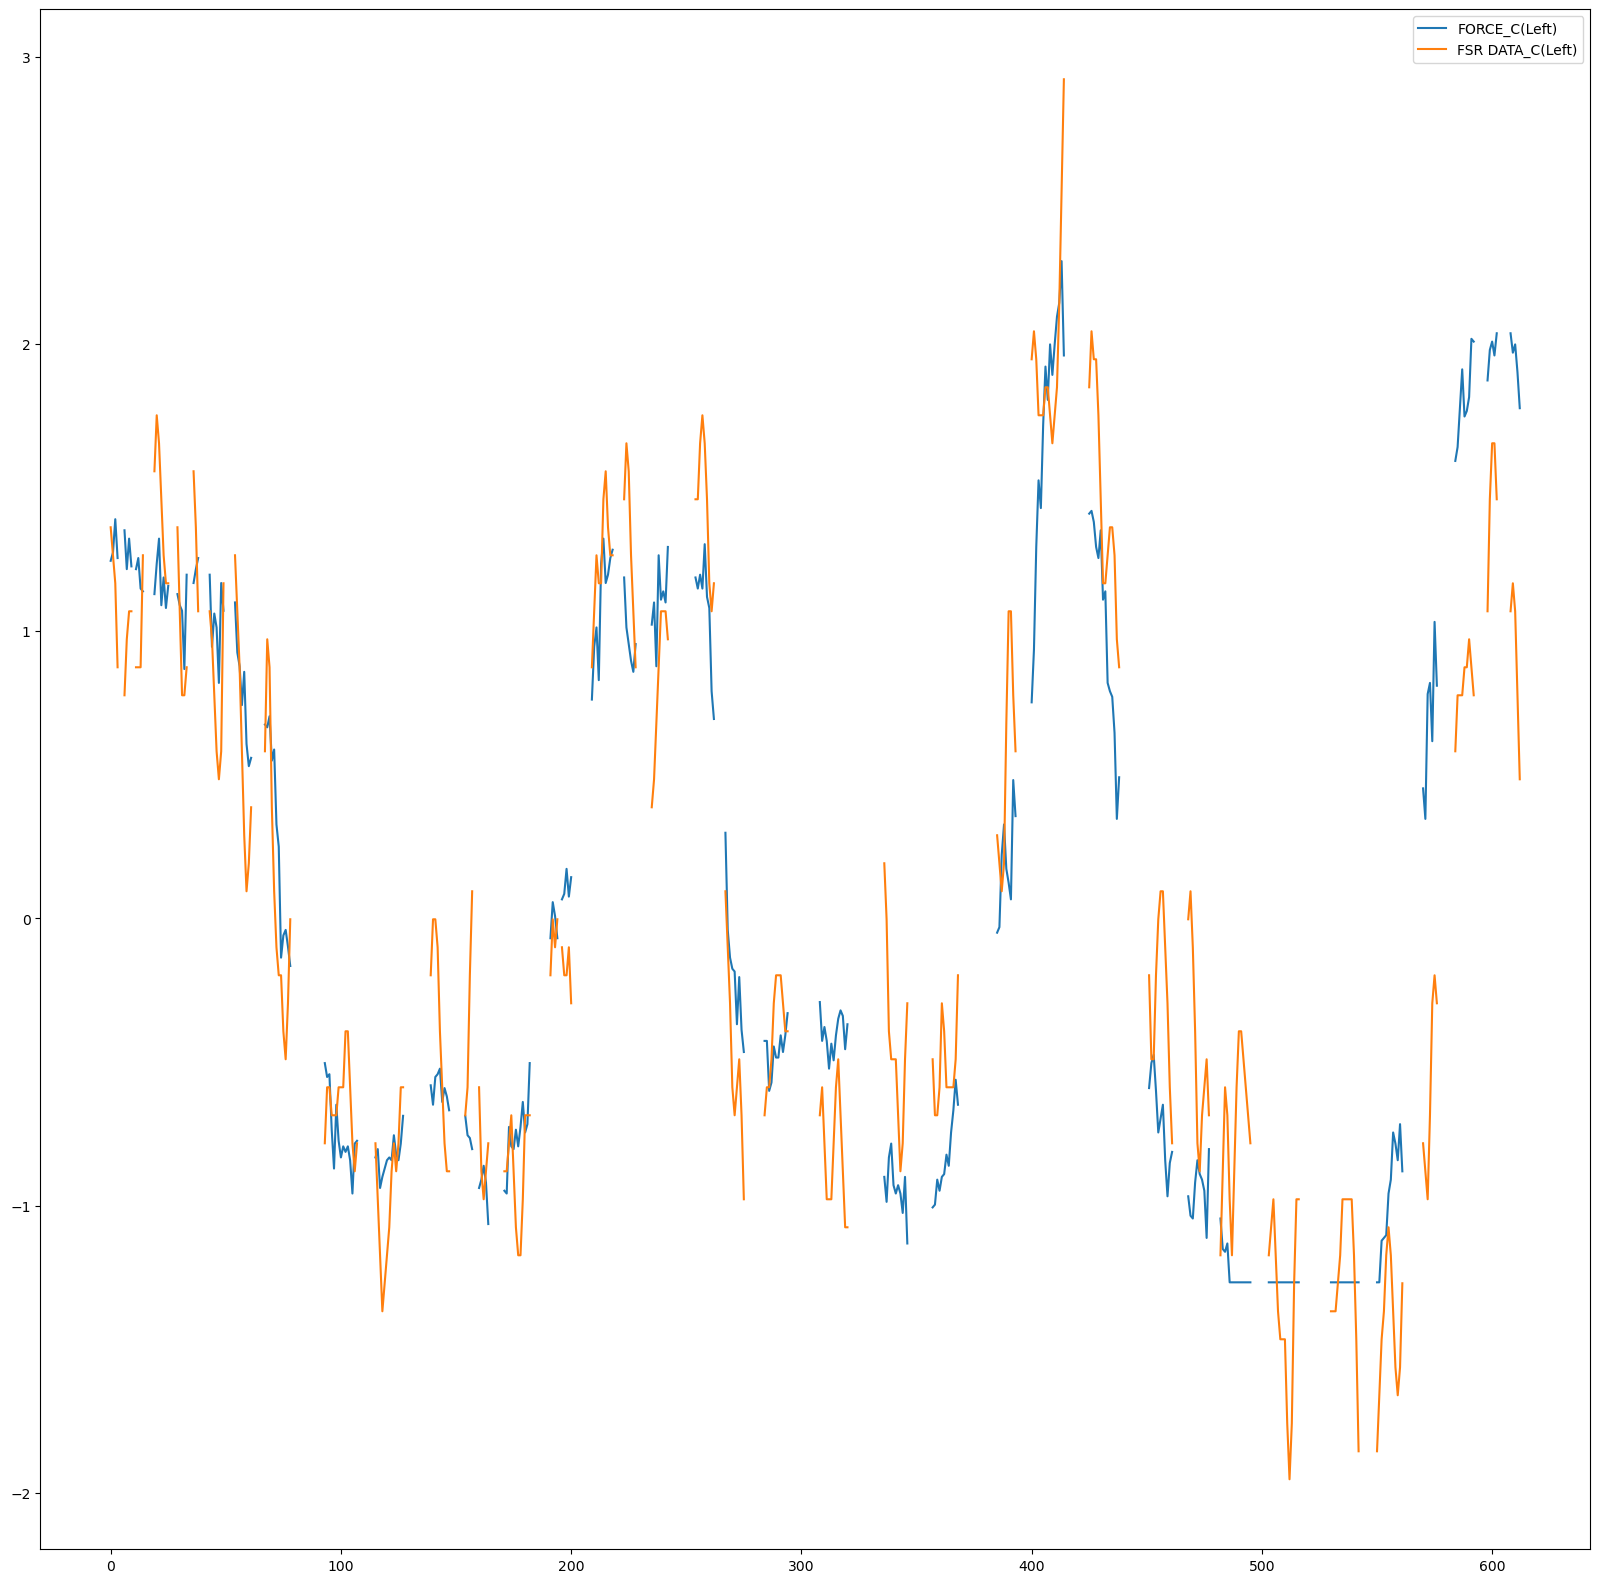

In [35]:
L.plot(figsize=(20,20))

<Axes: >

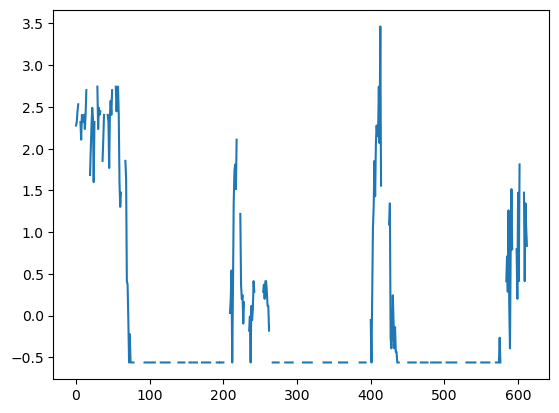

In [36]:
R['FORCE_B(Right)'].plot()

<Axes: >

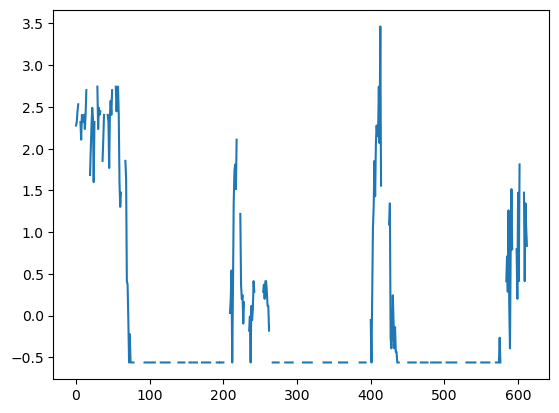

In [37]:
R['FORCE_B(Right)'].plot()

<Axes: >

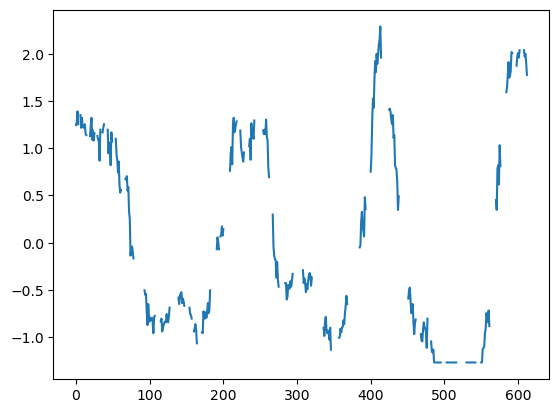

In [38]:
L['FORCE_C(Left)'].plot()

<Axes: >

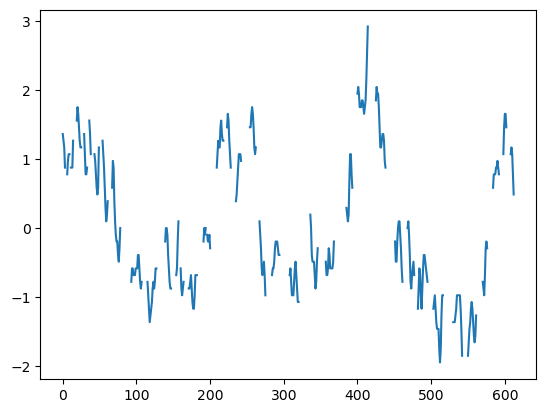

In [39]:
L['FSR DATA_C(Left)'].plot()

In [40]:
import numpy as np

index=R.index

loss_index_R_FORECE_B=np.array(R.index).reshape(-1,1)[R.iloc[:,0].isna()]
loss_index_R_FSR_B=np.array(R.index).reshape(-1,1)[R.iloc[:,1].isna()]

normal_index_R_FORECE_B=np.setdiff1d(index,loss_index_R_FORECE_B)
normal_index_R_FSR_B=np.setdiff1d(index,loss_index_R_FSR_B)

In [41]:
index=L.index

loss_index_L_FORECE_C=np.array(L.index).reshape(-1,1)[L.iloc[:,0].isna()]
loss_index_L_FSR_C=np.array(L.index).reshape(-1,1)[L.iloc[:,1].isna()]

normal_index_L_FORECE_C=np.setdiff1d(index,loss_index_L_FORECE_C)
normal_index_L_FSR_C=np.setdiff1d(index,loss_index_L_FSR_C)

In [42]:
x_train_R_FORECE_B=normal_index_R_FORECE_B.reshape(-1,1)
y_train_L_FORECE_C=L.iloc[normal_index_L_FORECE_C,0]
x_test_L_FORECE_C=loss_index_L_FORECE_C

x_train_R_FSR_B=normal_index_R_FSR_B.reshape(-1,1)
y_train_L_FSR_C=L.iloc[normal_index_L_FSR_C,1]
x_test_L_FSR_C=loss_index_L_FSR_C

L_FORCE_C=L.iloc[:,0].copy()
L_FSR_C=L.iloc[:,1].copy()

In [43]:
print(x_train_R_FORECE_B.shape)

(348, 1)


In [44]:
print(x_train_R_FORECE_B.shape)
print(y_train_L_FORECE_C.shape)

(348, 1)
(348,)


In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM



model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(348, 1)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')

In [46]:
model.fit(x_train_R_FORECE_B,y_train_L_FORECE_C,epochs=1000,batch_size=1,verbose=2)
pred=model.predict(x_test_L_FORECE_C)
pred=pred.reshape(-1,1)

Epoch 1/1000
348/348 - 0s - loss: 1.6238 - 453ms/epoch - 1ms/step
Epoch 2/1000
348/348 - 0s - loss: 1.1437 - 142ms/epoch - 409us/step
Epoch 3/1000
348/348 - 0s - loss: 1.1923 - 137ms/epoch - 393us/step
Epoch 4/1000
348/348 - 0s - loss: 1.2249 - 175ms/epoch - 503us/step
Epoch 5/1000
348/348 - 0s - loss: 1.1632 - 143ms/epoch - 410us/step
Epoch 6/1000
348/348 - 0s - loss: 1.2409 - 136ms/epoch - 391us/step
Epoch 7/1000
348/348 - 0s - loss: 1.0137 - 148ms/epoch - 426us/step
Epoch 8/1000
348/348 - 0s - loss: 1.2624 - 137ms/epoch - 393us/step
Epoch 9/1000
348/348 - 0s - loss: 1.2828 - 135ms/epoch - 389us/step
Epoch 10/1000
348/348 - 0s - loss: 1.2255 - 150ms/epoch - 432us/step
Epoch 11/1000
348/348 - 0s - loss: 1.1235 - 135ms/epoch - 387us/step
Epoch 12/1000
348/348 - 0s - loss: 1.0554 - 131ms/epoch - 376us/step
Epoch 13/1000
348/348 - 0s - loss: 1.1107 - 150ms/epoch - 431us/step
Epoch 14/1000
348/348 - 0s - loss: 1.1013 - 139ms/epoch - 399us/step
Epoch 15/1000
348/348 - 0s - loss: 1.0585 - 1

In [47]:
c=0
for i in loss_index_L_FORECE_C:    
    L_FORCE_C[i]=pred[c]
    c+=1

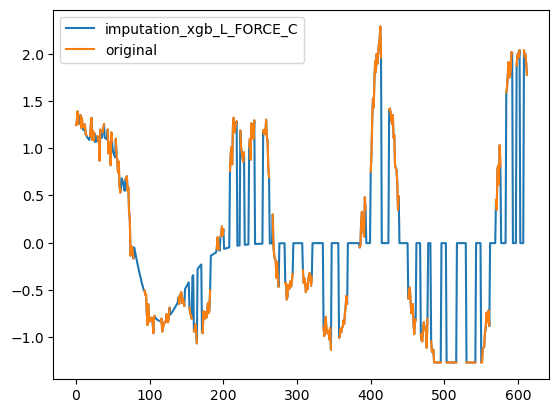

In [48]:
import matplotlib.pyplot as plt 
plt.plot(L_FORCE_C,label='imputation_xgb_L_FORCE_C')
plt.plot(L.iloc[:,0],label='original')
plt.legend()

In [49]:
model.fit(x_train_R_FSR_B,y_train_L_FSR_C,epochs=1000,batch_size=1,verbose=2)
pred=model.predict(x_test_L_FORECE_C)
pred=pred.reshape(-1,1)

Epoch 1/1000
348/348 - 0s - loss: 0.8649 - 195ms/epoch - 562us/step
Epoch 2/1000
348/348 - 0s - loss: 0.8539 - 134ms/epoch - 386us/step
Epoch 3/1000
348/348 - 0s - loss: 0.8542 - 138ms/epoch - 397us/step
Epoch 4/1000
348/348 - 0s - loss: 0.8534 - 142ms/epoch - 409us/step
Epoch 5/1000
348/348 - 0s - loss: 0.8521 - 158ms/epoch - 453us/step
Epoch 6/1000
348/348 - 0s - loss: 0.8533 - 161ms/epoch - 462us/step
Epoch 7/1000
348/348 - 0s - loss: 0.8516 - 169ms/epoch - 485us/step
Epoch 8/1000
348/348 - 0s - loss: 0.8571 - 178ms/epoch - 510us/step
Epoch 9/1000
348/348 - 0s - loss: 0.8510 - 145ms/epoch - 416us/step
Epoch 10/1000
348/348 - 0s - loss: 0.8527 - 141ms/epoch - 405us/step
Epoch 11/1000
348/348 - 0s - loss: 0.8553 - 140ms/epoch - 402us/step
Epoch 12/1000
348/348 - 0s - loss: 0.8568 - 139ms/epoch - 400us/step
Epoch 13/1000
348/348 - 0s - loss: 0.8510 - 142ms/epoch - 408us/step
Epoch 14/1000
348/348 - 0s - loss: 0.8566 - 145ms/epoch - 416us/step
Epoch 15/1000
348/348 - 0s - loss: 0.8536 -

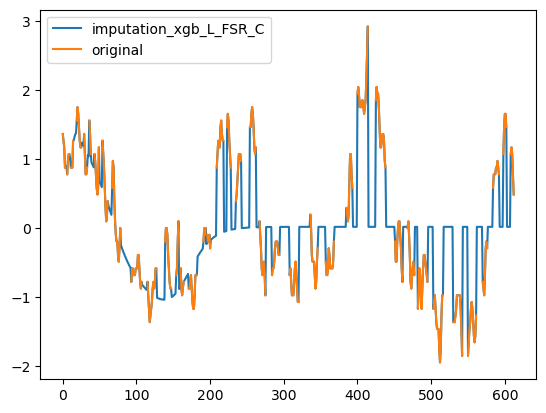

In [50]:
c=0
for i in loss_index_L_FSR_C:    
    L_FSR_C[i]=pred[c]
    c+=1
    
    
plt.plot(L_FSR_C,label='imputation_xgb_L_FSR_C')
plt.plot(L.iloc[:,1],label='original')
plt.legend()

In [55]:
L.isnull().sum()



0    0
1    0
dtype: int64

In [59]:
for i in loss_index_L_FORECE_C:    
    L['FORCE_C(Left)'][i]=L_FORCE_C[i]
    
for i in loss_index_L_FSR_C:    
    L['FSR DATA_C(Left)'][i]=L_FSR_C[i]

KeyError: 'FORCE_C(Left)'

<Axes: >

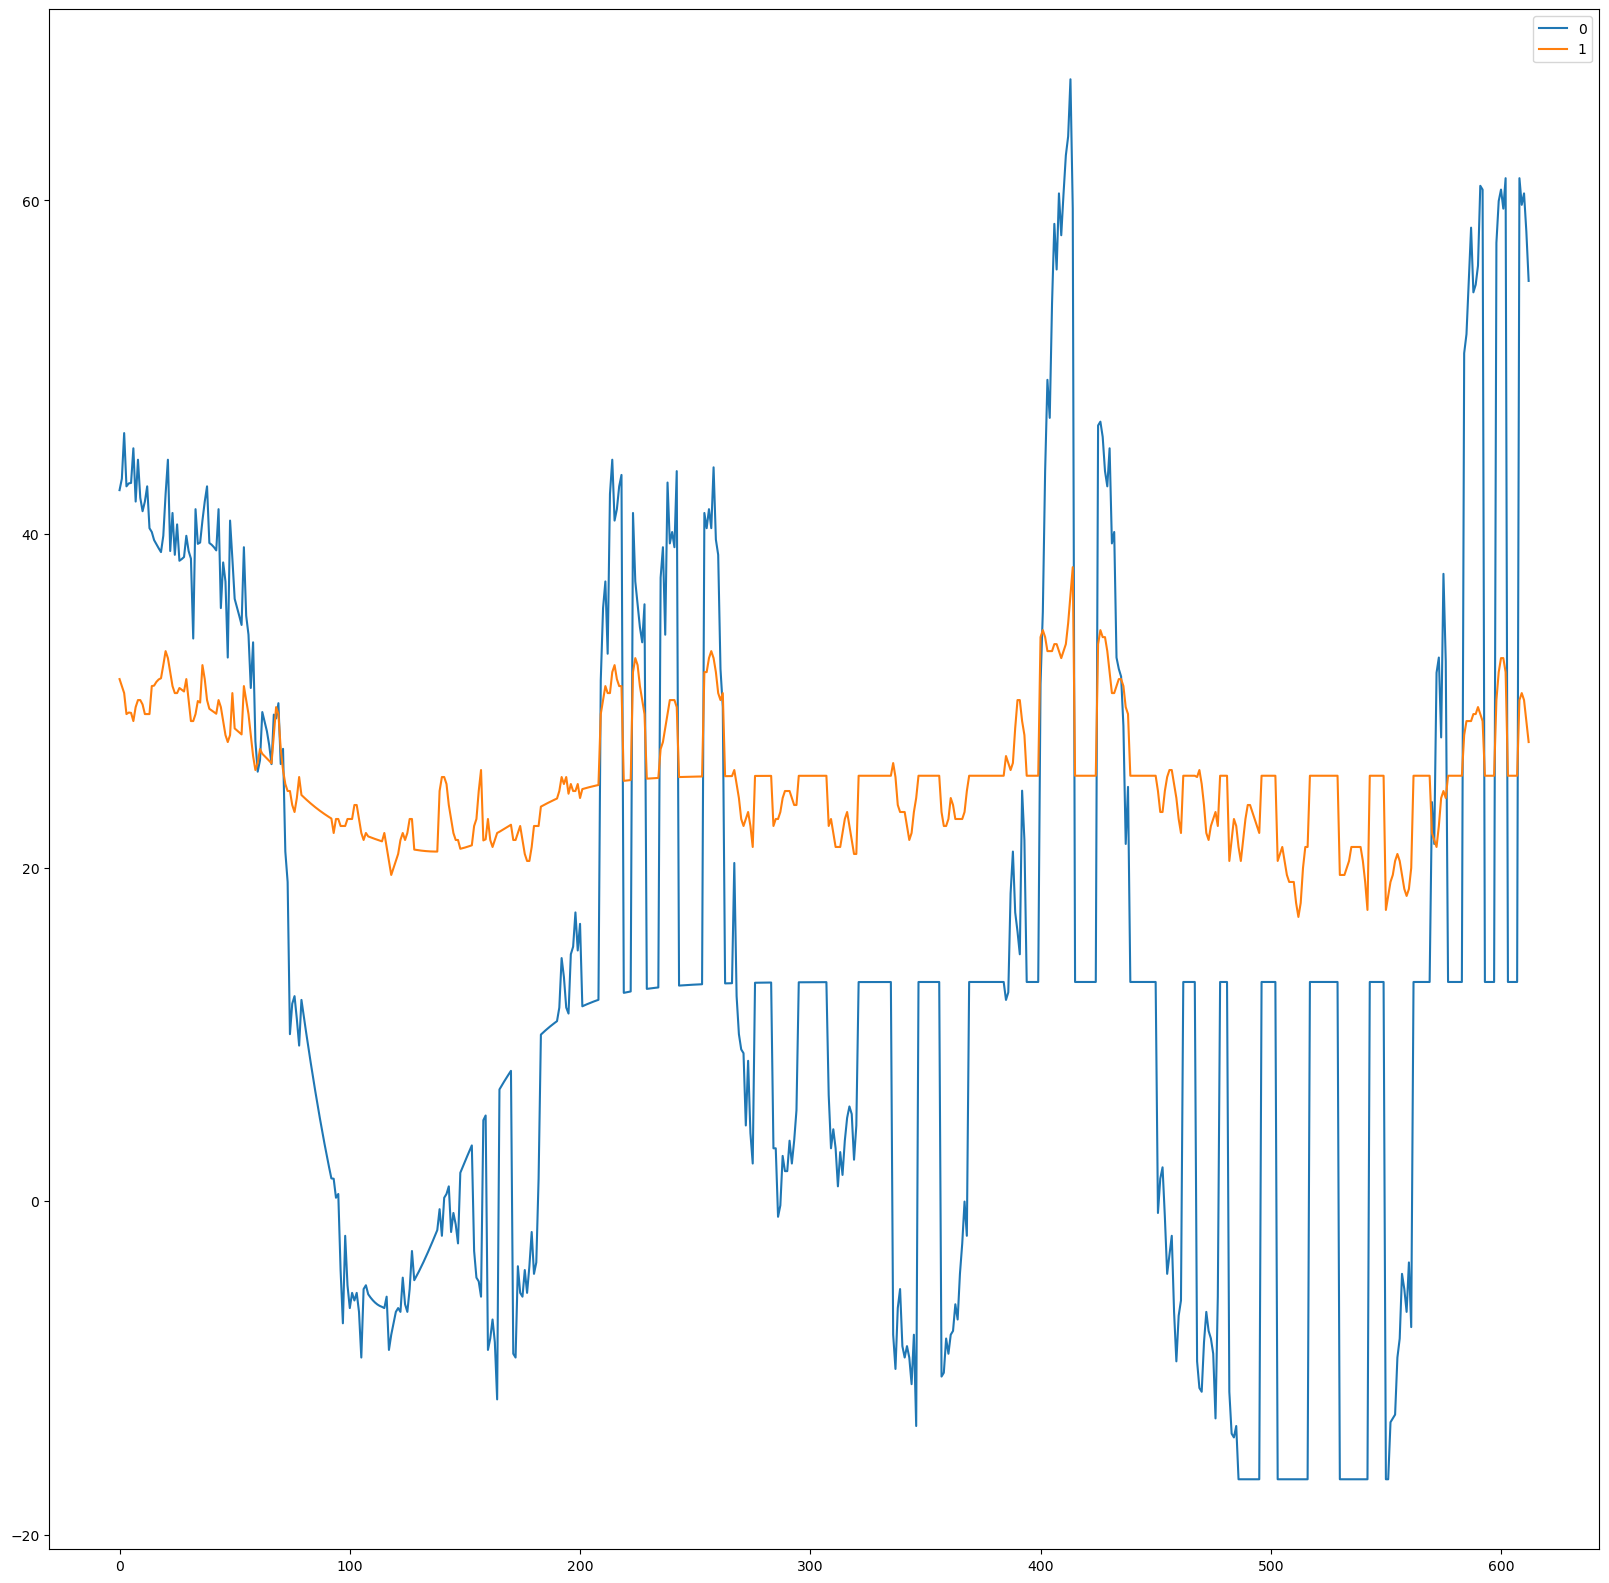

In [57]:
L.plot(figsize=(20,20))

<Axes: >

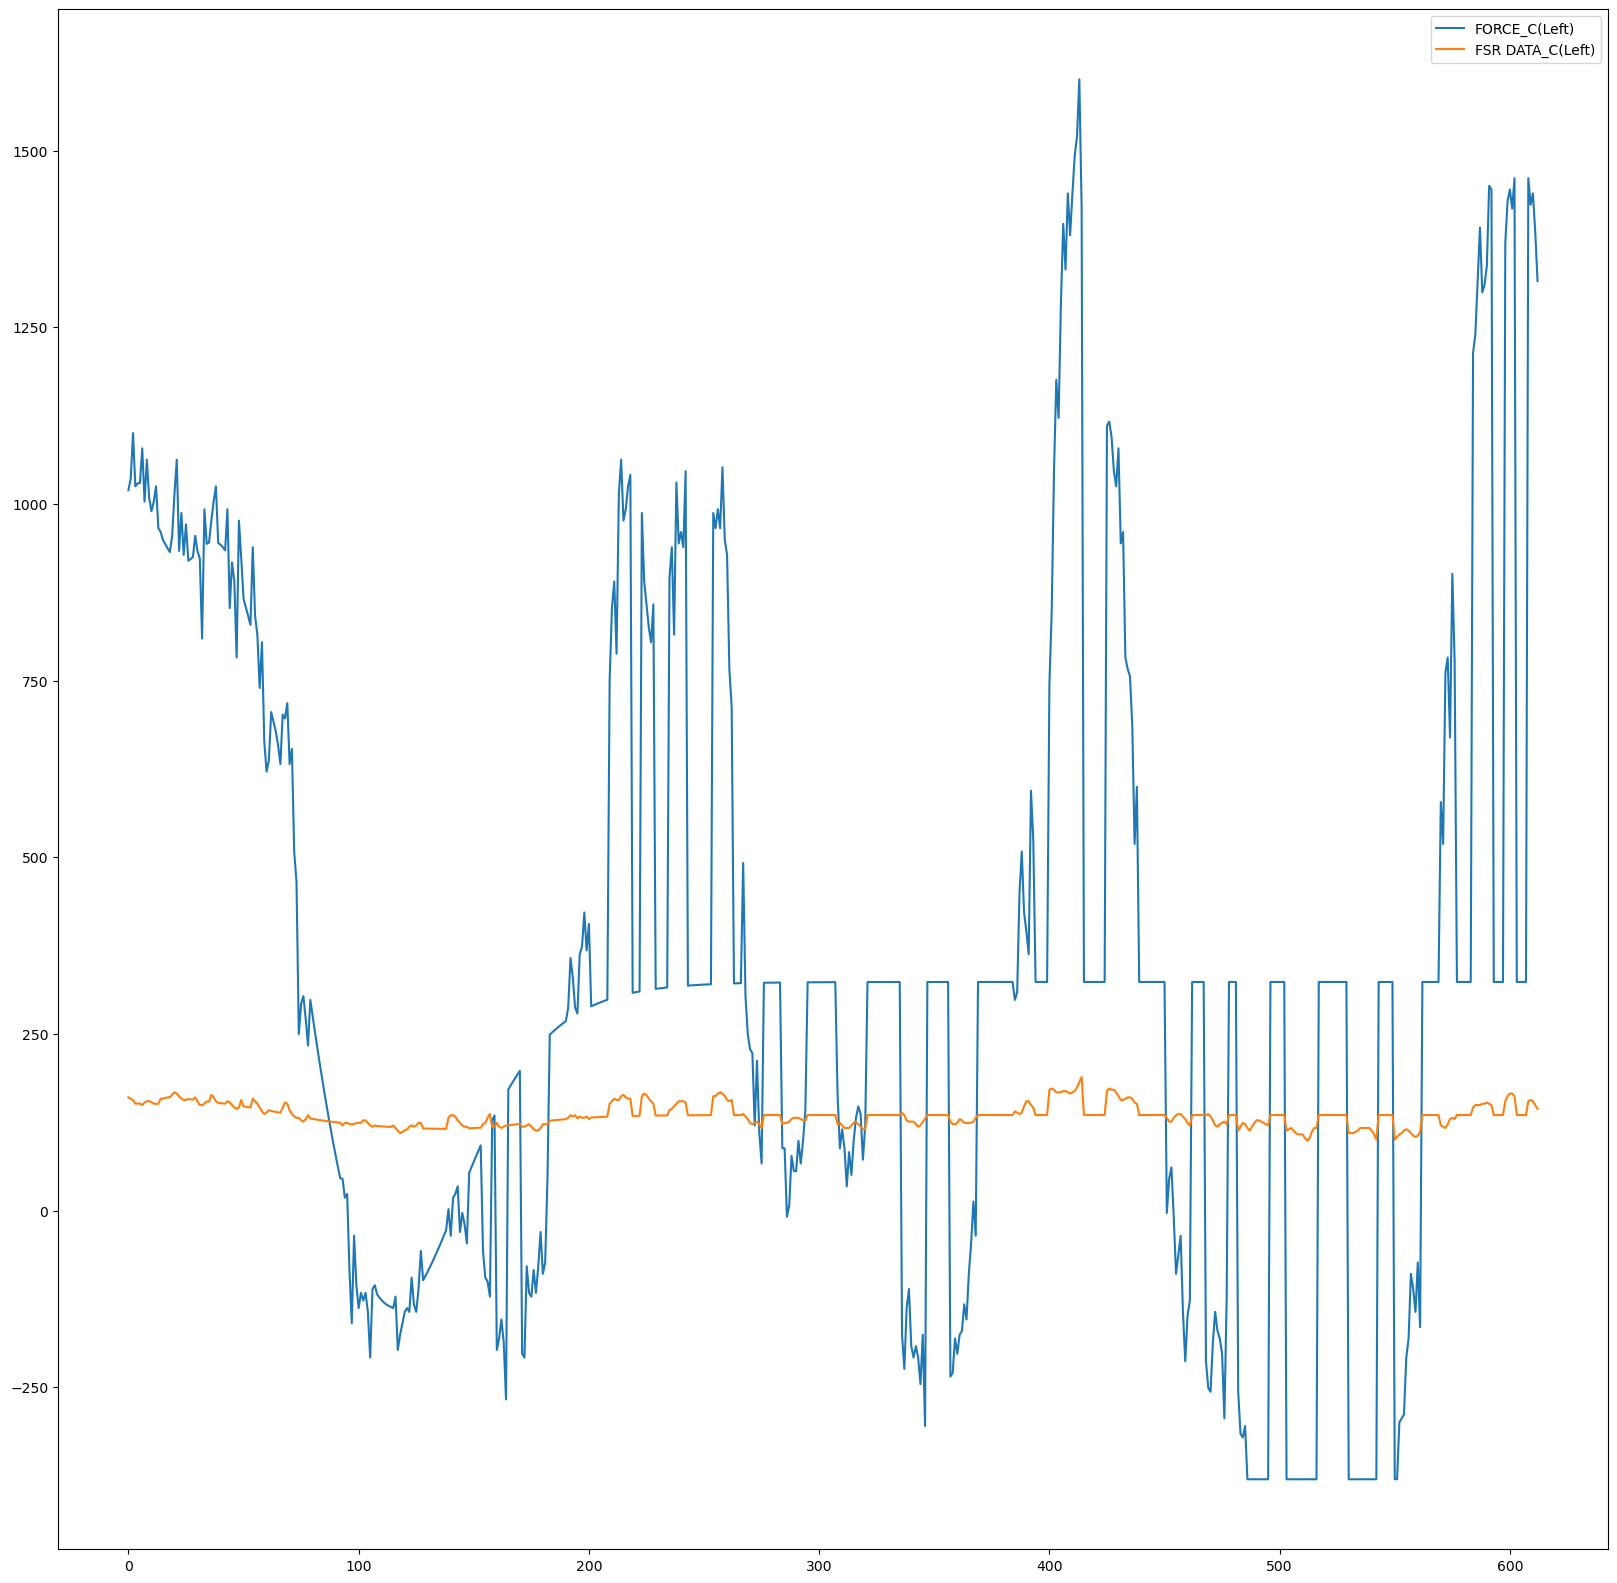

In [58]:
L = pd.DataFrame(scaler.inverse_transform(L))
L_sca=L.set_axis(["FORCE_C(Left)","FSR DATA_C(Left)"],axis="columns")
L_sca.plot(figsize=(20,20))


In [ ]:
from sklearn.metrics import mean_squared_error
print('Train rmse:', np.sqrt(mean_squared_error(y_train_L_FORECE_C, )))